In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-590-IN1_Capstone Project/Capstone_Project/Capstone_Codebase/Capstone Project Results/eda_and_preprocessing_results.zip"

Archive:  /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-590-IN1_Capstone Project/Capstone_Project/Capstone_Codebase/Capstone Project Results/eda_and_preprocessing_results.zip
   creating: kaggle/working/
   creating: kaggle/working/.virtual_documents/
  inflating: kaggle/working/eda_cluster_representatives.png  
  inflating: kaggle/working/metadata.csv  
  inflating: kaggle/working/coral_features.npy  
  inflating: kaggle/working/valid_paths.csv  
  inflating: kaggle/working/eda_metrics_corr.png  
  inflating: kaggle/working/eda_brightness_saturation_by_cluster.png  
  inflating: kaggle/working/eda_cluster_counts.png  
  inflating: kaggle/working/eda_texture_by_cluster.png  
  inflating: kaggle/working/eda_folder_counts_with_clipped.png  
  inflating: kaggle/working/tsne_results.npy  
  inflating: kaggle/working/cluster_color_metrics.csv  
  inflating: kaggle/working/eda_folder_counts.png  
  inflating: kaggle/working/coral_clusters.csv  
  inflating: kaggle/working/eda_tsn

In [10]:
!unzip "/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-590-IN1_Capstone Project/Capstone_Project/Capstone_Codebase/Capstone Project Results/modeling_results.zip" -d "/content/eda_results"

Archive:  /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-590-IN1_Capstone Project/Capstone_Project/Capstone_Codebase/Capstone Project Results/modeling_results.zip
   creating: /content/eda_results/kaggle/working/
  inflating: /content/eda_results/kaggle/working/cluster_distribution_by_source.png  
   creating: /content/eda_results/kaggle/working/.virtual_documents/
  inflating: /content/eda_results/kaggle/working/efficientnetv2s_coral_clusters.keras  
  inflating: /content/eda_results/kaggle/working/metadata_with_clusters.csv  
  inflating: /content/eda_results/kaggle/working/feature_logreg_pipeline.joblib  
  inflating: /content/eda_results/kaggle/working/simple_nn_classifier.h5  
  inflating: /content/eda_results/kaggle/working/confusion_matrix.png  
  inflating: /content/eda_results/kaggle/working/efficientnetv2s_training_report_summary.csv  
  inflating: /content/eda_results/kaggle/working/coral_dataset_with_clusters_and_metrics.csv  
   creating: /content/eda_results/ka

In [9]:
!unzip "/content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-590-IN1_Capstone Project/Capstone_Project/Capstone_Codebase/Capstone Project Results/modeling_results.zip" -d "/content/modeling_results"

Archive:  /content/drive/MyDrive/MS_in_AAI/Courses_and_Projects/AAI-590-IN1_Capstone Project/Capstone_Project/Capstone_Codebase/Capstone Project Results/modeling_results.zip
   creating: /content/modeling_results/kaggle/working/
  inflating: /content/modeling_results/kaggle/working/cluster_distribution_by_source.png  
   creating: /content/modeling_results/kaggle/working/.virtual_documents/
  inflating: /content/modeling_results/kaggle/working/efficientnetv2s_coral_clusters.keras  
  inflating: /content/modeling_results/kaggle/working/metadata_with_clusters.csv  
  inflating: /content/modeling_results/kaggle/working/feature_logreg_pipeline.joblib  
  inflating: /content/modeling_results/kaggle/working/simple_nn_classifier.h5  
  inflating: /content/modeling_results/kaggle/working/confusion_matrix.png  
  inflating: /content/modeling_results/kaggle/working/efficientnetv2s_training_report_summary.csv  
  inflating: /content/modeling_results/kaggle/working/coral_dataset_with_clusters_and_

In [12]:
!ls -lrt "/content/modeling_results/kaggle/working/efficientnetv2s_training_report_summary.csv"

-rw-r--r-- 1 root root 1429 Nov 23 06:22 /content/modeling_results/kaggle/working/efficientnetv2s_training_report_summary.csv


# 1. How effective was your machine learning model(s) at learning the task? e.g. Did the model(s) overfit/underfit the training data? What does the training accuracy/loss curve(s) look like for your model(s)?

## Load Training History

In [21]:
history_path = "/content/eda_results/kaggle/working/efficientnetv2s_training_report_summary.csv"

history = pd.read_csv(history_path)
history.head()

,Unnamed: 0,0
0,n_samples,39044
1,n_classes (clusters),5
2,feature_model_lr_acc,0.9883323847467274
3,image_model_val_acc,0.8998292544109278
4,image_model_macro_f1,0.8923051186181343


In [22]:
efficientnetv2s_training_report_summary = pd.read_csv("/content/eda_results/kaggle/working/efficientnetv2s_training_report_summary.csv")
efficientnetv2s_training_report_summary

,Unnamed: 0,0
0,n_samples,39044
1,n_classes (clusters),5
2,feature_model_lr_acc,0.9883323847467274
3,image_model_val_acc,0.8998292544109278
4,image_model_macro_f1,0.8923051186181343
5,image_model_weighted_f1,0.8997202623294729
6,image_model_macro_precision,0.9044900627324332
7,image_model_weighted_precision,0.9011804019446629
8,image_model_macro_recall,0.8820135196662019
9,image_model_weighted_recall,0.8998292544109278


## efficientnetv2s Training Plots

In [25]:
log_file = "/content/efficientnetv2s_training_log.txt"

with open(log_file, "r") as f:
    log = f.read()

# Regex to capture epoch-level summaries at the end of each epoch
pattern = re.compile(
    r"accuracy:\s*([0-9.]+)\s*-\s*loss:\s*([0-9.]+).*?"
    r"val_accuracy:\s*([0-9.]+)\s*-\s*val_loss:\s*([0-9.]+)",
    re.DOTALL
)

matches = pattern.findall(log)

epochs = []
train_acc = []
train_loss = []
val_acc = []
val_loss = []

for i, m in enumerate(matches):
    epochs.append(i+1)
    train_acc.append(float(m[0]))
    train_loss.append(float(m[1]))
    val_acc.append(float(m[2]))
    val_loss.append(float(m[3]))

df = pd.DataFrame({
    "epoch": epochs,
    "train_acc": train_acc,
    "train_loss": train_loss,
    "val_acc": val_acc,
    "val_loss": val_loss
})

df

,epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.4604,1.80537,0.1917,4.0015
1,2,0.6818,0.78100,0.6659,0.8579
2,3,0.7274,0.64800,0.4152,1.4921
3,4,0.7567,0.59550,0.2255,2.5155
4,5,0.7749,0.53750,0.1844,2.6119
5,6,0.7959,0.49170,0.7002,1.0330


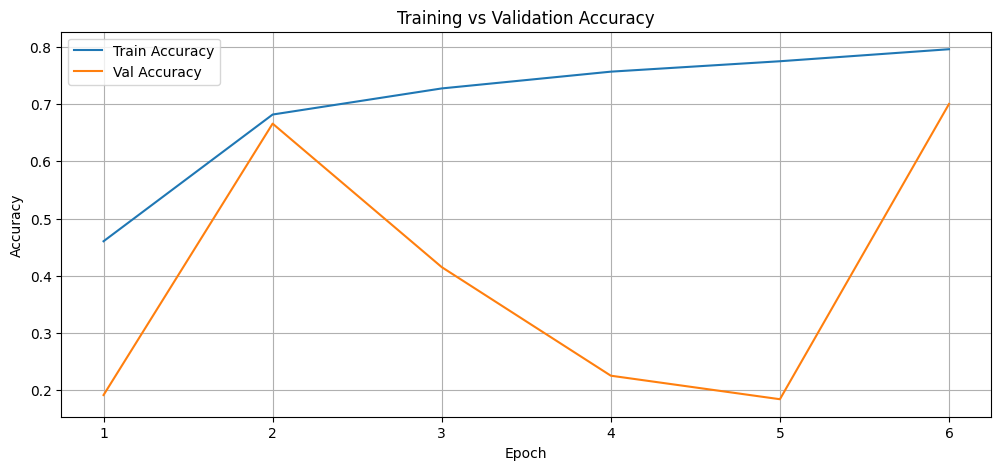

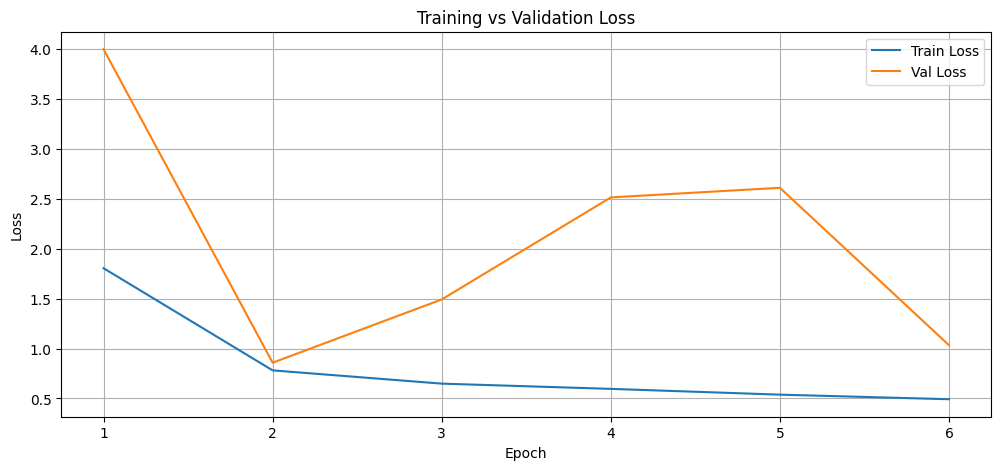

In [26]:
plt.figure(figsize=(12,5))
plt.plot(df["epoch"], df["train_acc"], label="Train Accuracy")
plt.plot(df["epoch"], df["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df["epoch"], df["train_loss"], label="Train Loss")
plt.plot(df["epoch"], df["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

## efficientnetv2s Finetuning Plots

In [27]:
log_file = "/content/efficientnetv2s_finetuning_log.txt"

with open(log_file, "r") as f:
    log = f.read()

# Regex to capture loss, acc, val_acc
pattern = re.compile(
    r"loss=([0-9.]+), acc=([0-9.]+), val_acc=([0-9.]+)"
)

matches = pattern.findall(log)

epochs = []
train_acc = []
train_loss = []
val_acc = []

for i, m in enumerate(matches):
    epochs.append(i+1)
    train_loss.append(float(m[0]))
    train_acc.append(float(m[1]))
    val_acc.append(float(m[2]))

df_ft = pd.DataFrame({
    "epoch": epochs,
    "train_acc": train_acc,
    "train_loss": train_loss,
    "val_acc": val_acc
})

df_ft

,epoch,train_acc,train_loss,val_acc
0,1,0.8303,0.4095,0.8786
1,2,0.8380,0.3885,0.8832
2,3,0.8452,0.3700,0.8808
3,4,0.8579,0.3367,0.8597
4,5,0.8594,0.3359,0.8957
5,6,0.8683,0.3159,0.8715


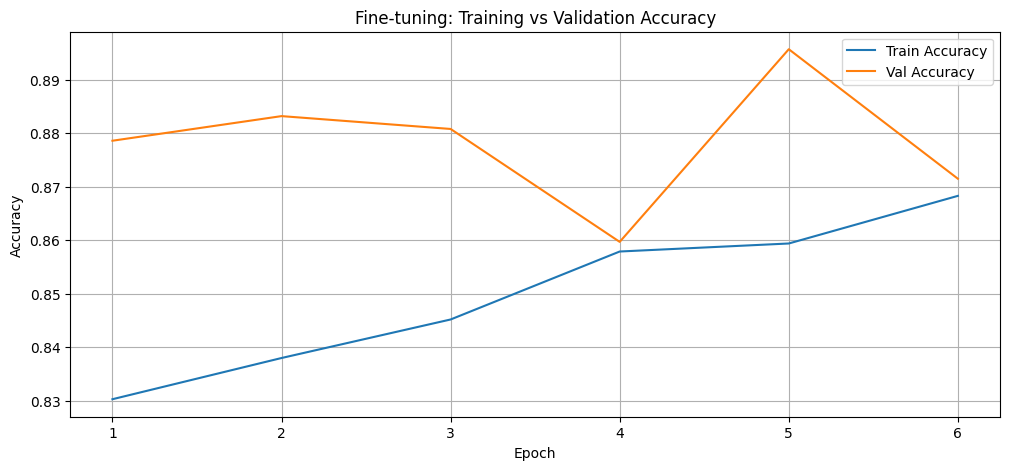

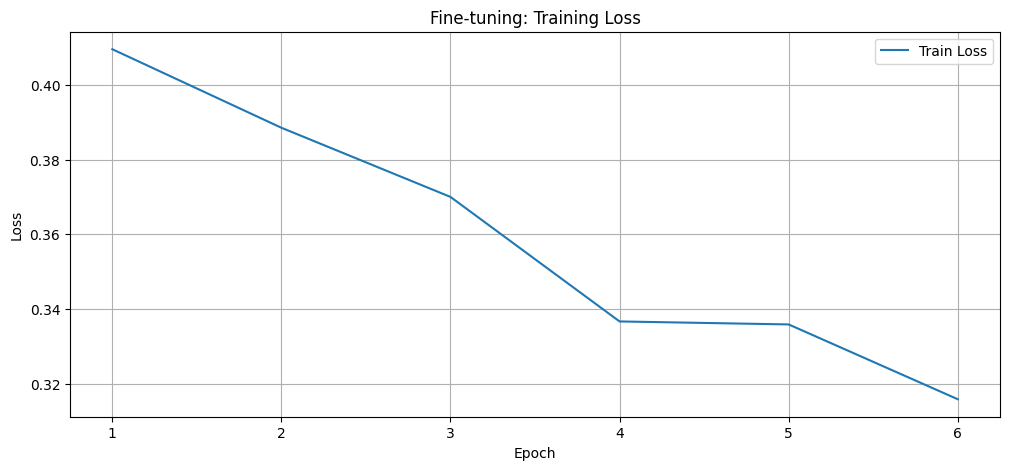

In [28]:
plt.figure(figsize=(12,5))
plt.plot(df_ft["epoch"], df_ft["train_acc"], label="Train Accuracy")
plt.plot(df_ft["epoch"], df_ft["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Fine-tuning: Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df_ft["epoch"], df_ft["train_loss"], label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Fine-tuning: Training Loss")
plt.legend()
plt.grid(True)
plt.show()